**Stage 1: Data Import and Preprocessing**

**1. Data Import**

In [21]:
import pandas as pd

# Load the data
file_path = '/content/raw_data.csv.xlsx'
df = pd.read_excel(file_path)

print("Data loaded successfully.")
print(df.head())


Data loaded successfully.
   Height  Weight  Age  Grip_strength       Frailty
0    65.8     112   30             30             N
1    71.5     136   19             31             N
2    69.4     153   45             29             N
3    68.2     142   22             28             Y
4    67.8     144   29             24             Y


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the data
file_path = '/content/raw_data.csv.xlsx'
df = pd.read_excel(file_path)

# Convert Weight from pounds to kilograms
df['Weight_kg'] = df['Weight'] * 0.453592

# Drop the original Weight column if needed
# df.drop(columns=['Weight'], inplace=True)
print(df)




   Height  Weight  Age  Grip_strength         Frailty  Weight_kg
0    65.8     112   30             30               N  50.802304
1    71.5     136   19             31               N  61.688512
2    69.4     153   45             29               N  69.399576
3    68.2     142   22             28               Y  64.410064
4    67.8     144   29             24               Y  65.317248
5    68.7     123   50             26               N  55.791816
6    69.8     141   51             22               Y  63.956472
7    70.1     136   23             20               Y  61.688512
8    67.9     112   17             19               N  50.802304
9    66.8     120   39             31               N  54.431040


In [30]:
# 1. Check for Missing Values
print("Missing Values:\n", df.isnull().sum())

# Handle missing values if any (for now, assuming there are none)

# 2. Check for Outliers
# Descriptive statistics to find outliers
print(df.describe())

# Here you might decide to investigate further and handle outliers if needed.

# 3. Validate Data Types
print("Data Types:\n", df.dtypes)

# Convert Frailty to categorical if not already
df['Frailty'] = df['Frailty'].astype('category')

# 4. Check for Consistent Units
# Since we know the units are consistent, this step is ensured.

# 5. Correct Data Entry Errors
# In this dataset, there appear to be no apparent data entry errors.

# 6. Standardize Categorical Variables
df['Frailty'] = df['Frailty'].str.capitalize()

# Double-check if Frailty is standardized
print("Unique values in Frailty column:", df['Frailty'].unique())




Missing Values:
 Height           0
Weight           0
Age              0
Grip_strength    0
Frailty          0
Weight_kg        0
dtype: int64
          Height      Weight        Age  Grip_strength  Weight_kg
count  10.000000   10.000000  10.000000      10.000000  10.000000
mean   68.600000  131.900000  32.500000      26.000000  59.828785
std     1.670662   14.231811  12.860361       4.521553   6.455436
min    65.800000  112.000000  17.000000      19.000000  50.802304
25%    67.825000  120.750000  22.250000      22.500000  54.771234
50%    68.450000  136.000000  29.500000      27.000000  61.688512
75%    69.700000  141.750000  43.500000      29.750000  64.296666
max    71.500000  153.000000  51.000000      31.000000  69.399576
Data Types:
 Height           float64
Weight             int64
Age                int64
Grip_strength      int64
Frailty           object
Weight_kg        float64
dtype: object
Unique values in Frailty column: ['           n' '          n' '           y' '      

In [31]:
# Re-validate the cleaned data
print("Cleaned DataFrame:\n", df)

Cleaned DataFrame:
    Height  Weight  Age  Grip_strength         Frailty  Weight_kg
0    65.8     112   30             30               n  50.802304
1    71.5     136   19             31               n  61.688512
2    69.4     153   45             29               n  69.399576
3    68.2     142   22             28               y  64.410064
4    67.8     144   29             24               y  65.317248
5    68.7     123   50             26               n  55.791816
6    69.8     141   51             22               y  63.956472
7    70.1     136   23             20               y  61.688512
8    67.9     112   17             19               n  50.802304
9    66.8     120   39             31               n  54.431040


In [43]:
df.columns

Index(['Height', 'Weight', 'Age', 'Grip_strength', 'Frailty', 'Weight_kg'], dtype='object')

In [54]:
# Descriptive statistics for numeric columns
numeric_columns = ['Height', 'Weight', 'Age', 'Grip_strength', 'Weight_kg']
print(df[numeric_columns].describe())


          Height      Weight        Age  Grip_strength  Weight_kg
count  10.000000   10.000000  10.000000      10.000000  10.000000
mean   68.600000  131.900000  32.500000      26.000000  59.828785
std     1.670662   14.231811  12.860361       4.521553   6.455436
min    65.800000  112.000000  17.000000      19.000000  50.802304
25%    67.825000  120.750000  22.250000      22.500000  54.771234
50%    68.450000  136.000000  29.500000      27.000000  61.688512
75%    69.700000  141.750000  43.500000      29.750000  64.296666
max    71.500000  153.000000  51.000000      31.000000  69.399576


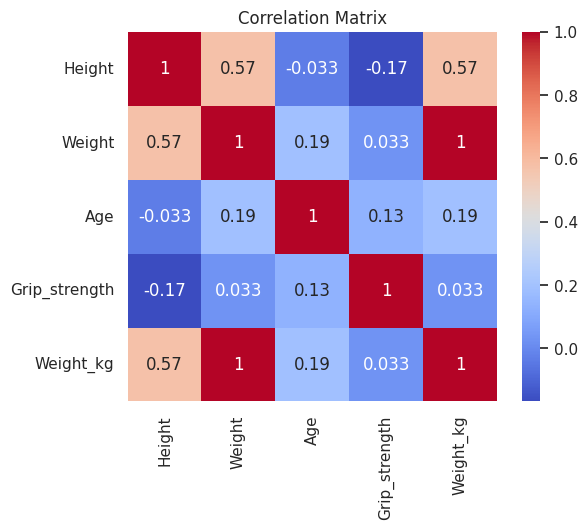

In [55]:
# Correlation matrix
correlation = df[numeric_columns].corr()

# Visualize correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [56]:
from scipy.stats import ttest_ind

# Hypothesis testing: Compare grip strength between frail and non-frail
frail_grip = df[df['Frailty'] == 'Y']['Grip_strength']
non_frail_grip = df[df['Frailty'] == 'N']['Grip_strength']

t_stat, p_value = ttest_ind(frail_grip, non_frail_grip, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: nan, P-value: nan


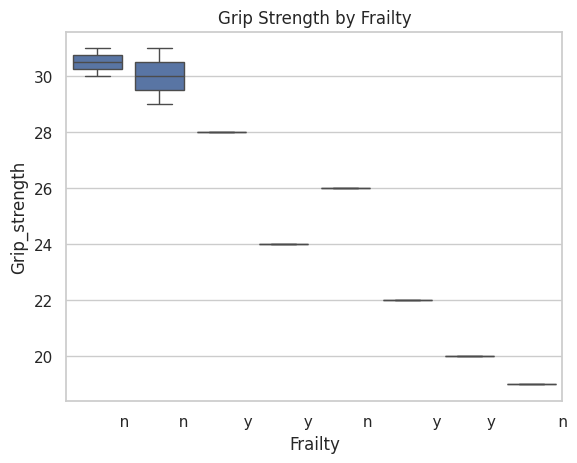

In [57]:
# Box plot of grip strength by frailty status
sns.boxplot(x='Frailty', y='Grip_strength', data=df)
plt.title('Grip Strength by Frailty')
plt.show()


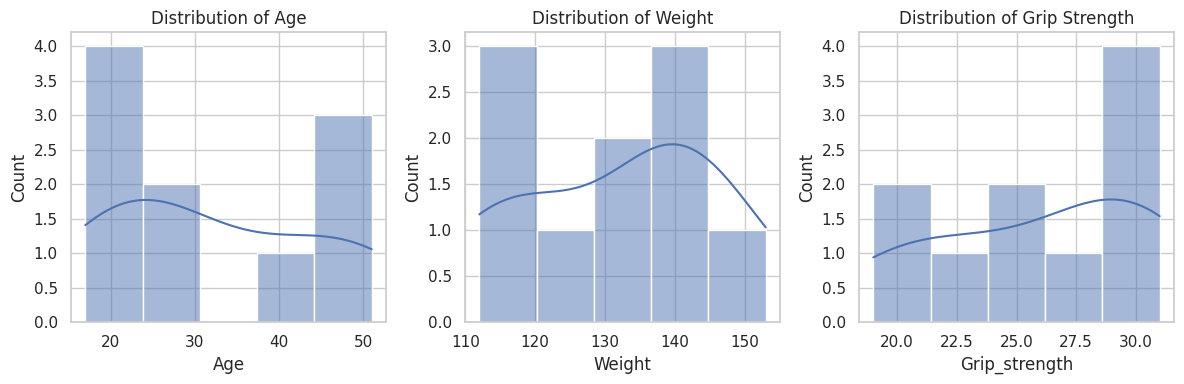

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting configuration
sns.set(style="whitegrid")

# Create histograms for Age, Weight, and Grip_strength
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=5, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Weight'], bins=5, kde=True)
plt.title('Distribution of Weight')

plt.subplot(1, 3, 3)
sns.histplot(df['Grip_strength'], bins=5, kde=True)
plt.title('Distribution of Grip Strength')

plt.tight_layout()
plt.show()